### Module 3 Continuation -  Advanced Plotting with Seaborn

**This section on advanced plotting is not on the midterm next week.**

Last week, we have learned how to make basic plots using the packages matplotlib and pandas. Seaborn allows us to make more complicated plots easily and quickly. They implement wrappers for code that is written in matplotlib. As such, the underyling figure and axes objects are also present in seaborn.

In seaborn, you can plot many columns of data at the same time, using x, y, size, hue, shape!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Preprocessing

In [2]:
nba_profiles = pd.read_csv('nba_players.csv')
nba_stats = pd.read_csv('nba_player_stats.csv') #2022-2023 season
nba_profiles['Full Name'] = nba_profiles['fname'] + ' ' + nba_profiles['lname']
nba = nba_profiles.merge(nba_stats, how='left', left_on='Full Name', right_on='Player')

In [3]:
mvp_awards = ['Joel Embiid',
                'Nikola Jokić',
                'Giannis Antetokounmpo',
                'James Harden',
                'Russell Westbrook',
                'Stephen Curry',
                'Kevin Durant',
                'LeBron James',
                'Derrick Rose',
                'LeBron James']


nba['MVP'] = nba['Full Name'].isin(mvp_awards)

In [4]:
# The height column is a string, so we should convert it to inches
def convert_height__to_numeric(x):
    sep = x.split('-')
    return float(sep[0])*12 + float(sep[1])
        
nba['height'] = nba.height.apply(convert_height__to_numeric)


In [5]:
def extract_year(x):
    sep = x.split('-')
    return float(sep[0])
nba['birth_year'] = nba['birthday'].apply(extract_year)

In [6]:
nba['From US'] = nba['country'] == 'USA'

#### Section 1: More Plots in Seaborn

___

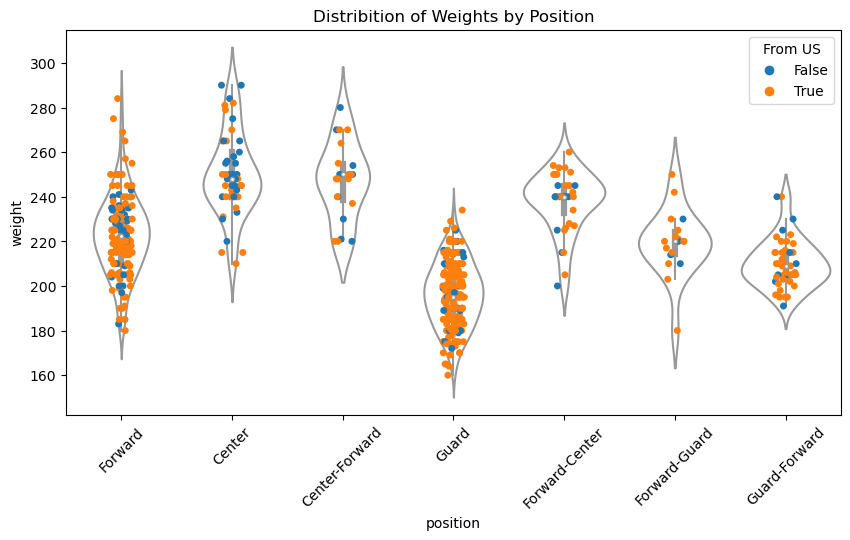

C:\Users\franc\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\franc\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\franc\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


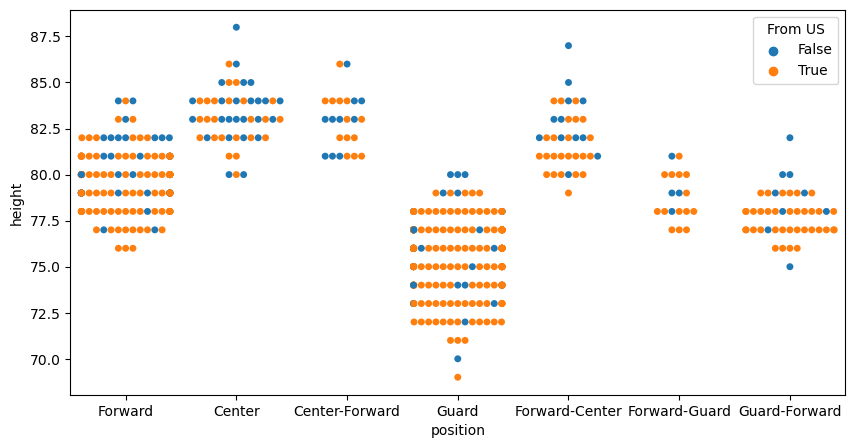

In [7]:

#Stripplot = > distributional plot that allows you to see all points 

fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(
    x = 'position',
    y='weight',
    hue='From US',
    data=nba,
    ax=ax
)
#Rotate the x axis labels
sns.violinplot(
    x = 'position',
    y='weight',
    data=nba,
    ax=ax,
    color='white'
)

plt.xticks(rotation=45)
plt.title('Distribition of Weights by Position')
plt.show()


#Swarmplots are the same, except it makes the points non-overlapping
fig, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(x='position', y='height', hue='From US', data=nba)
#Notice that there is a warning
plt.show()


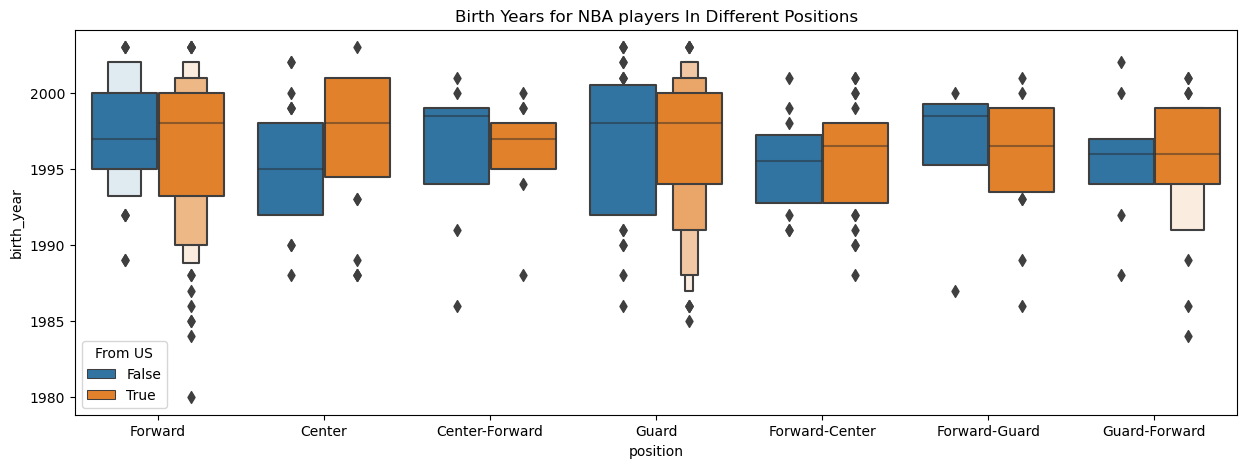

In [8]:
#Enhanced box plot => like the box plot but shows more quantiles

#Draft year
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxenplot(data=nba, x='position', y='birth_year', hue='From US', ax = ax)
plt.title('Birth Years for NBA players In Different Positions')
plt.show()




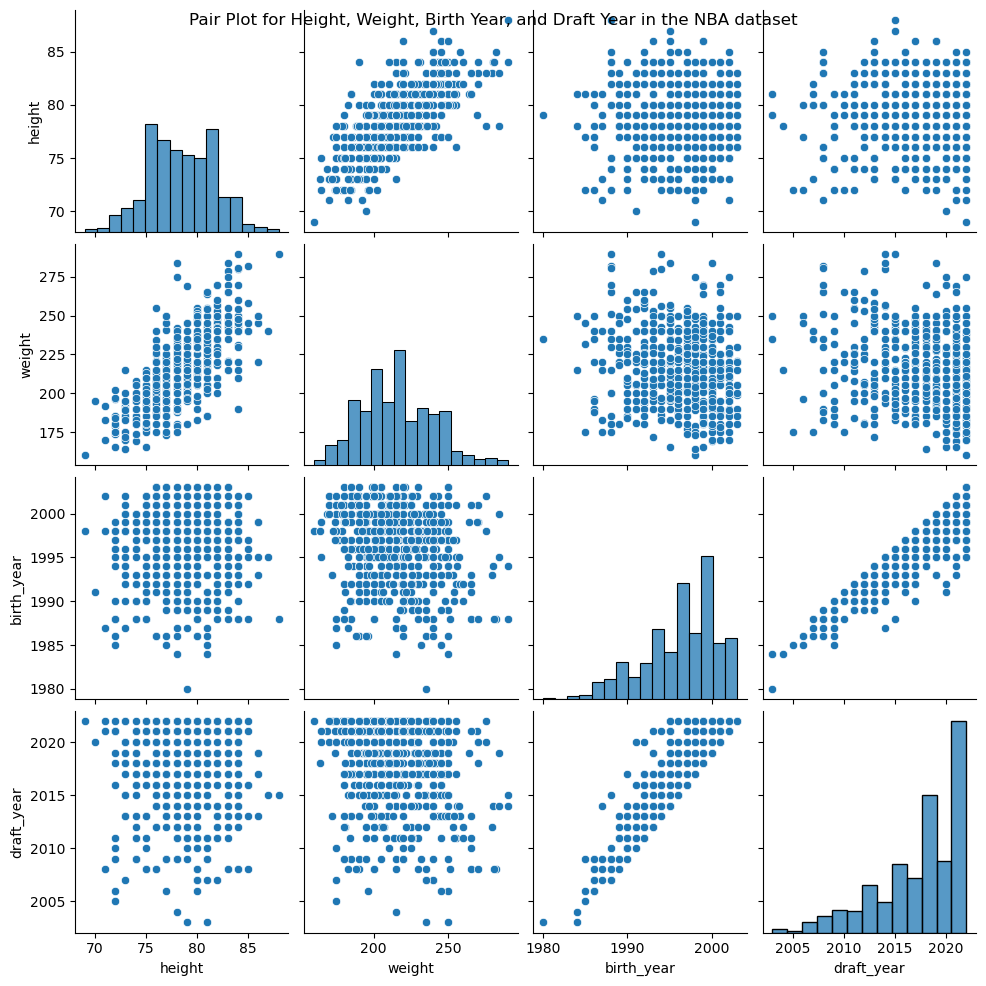

In [9]:
#Pairplot => plots te scatterplot between each pair of columns, as well as the histogram of each column
sns.pairplot(data=nba[['height', 'weight', 'birth_year', 'draft_year']])
plt.suptitle('Pair Plot for Height, Weight, Birth Year, and Draft Year in the NBA dataset')
plt.show()


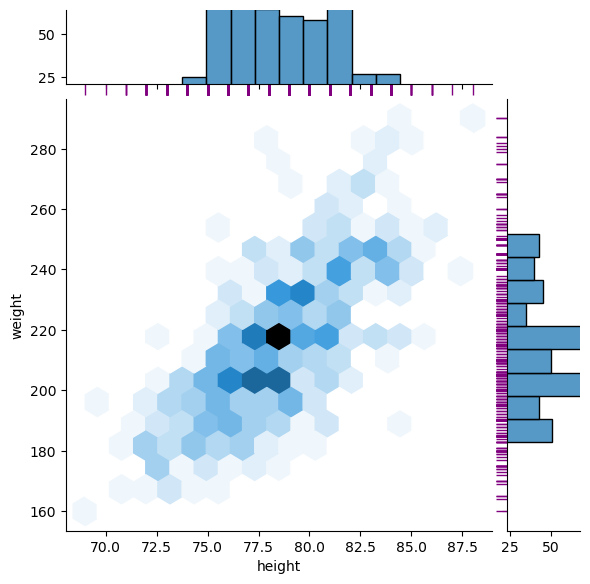

In [10]:
# The jointplot is a pairplot, except we use only two columns. It will plot the marginal distributions on the
# top and right spines


#There is a lot of customaization in the jointplot

#Parameter kind:
#1. 'scatter'
#2. 'kde'
#3. 'hist'
#4. 'hex'
#5. 'reg'
#6. 'resid'


# sns.jointplot(data=nba, x='height', y='weight')
# sns.jointplot(data=nba, x='height', y='3P%', kind='kde')
# sns.jointplot(data=nba, x='height', y='weight', kind='hist')
# sns.jointplot(data=nba, x='height', y='weight', kind='hex')
# sns.jointplot(data=nba, x='height', y='weight', kind='hex', marginal_ticks=True)



#You can add more layers to the plot by saving it and plotting more
g = sns.jointplot(data=nba, x='height', y='weight', kind='hex', marginal_ticks=True)
g.plot_marginals(sns.rugplot, color='purple', height=-0.15, clip_on=False)





<Axes: xlabel='height', ylabel='3P%'>

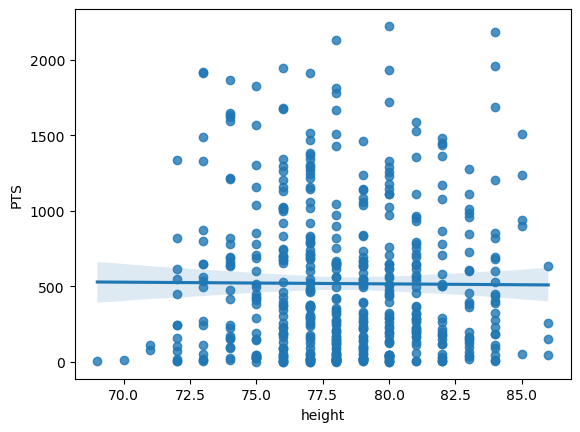

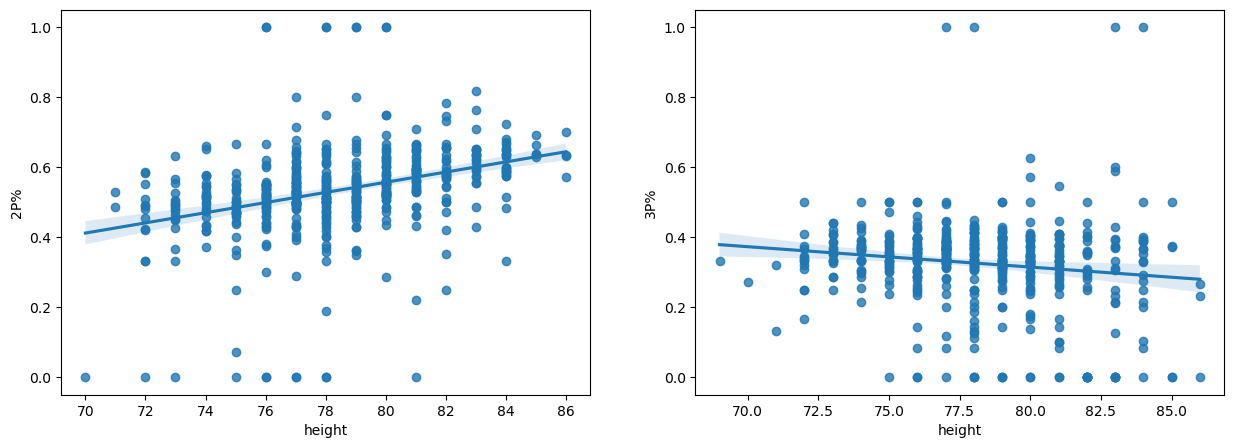

In [21]:
#Regression plot - plot a scatterplot with a regression line drawn through it


sns.regplot(data=nba, x='height', y='PTS') #There is virtually no relationship between height and points scored
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(data=nba, x='height', y='2P%', ax=ax[0])
sns.regplot(data=nba, x='height', y='3P%', ax=ax[1])

#sns.regplot(data=nba, x='height', y='FT%')



<Axes: xlabel='height', ylabel='2P%'>

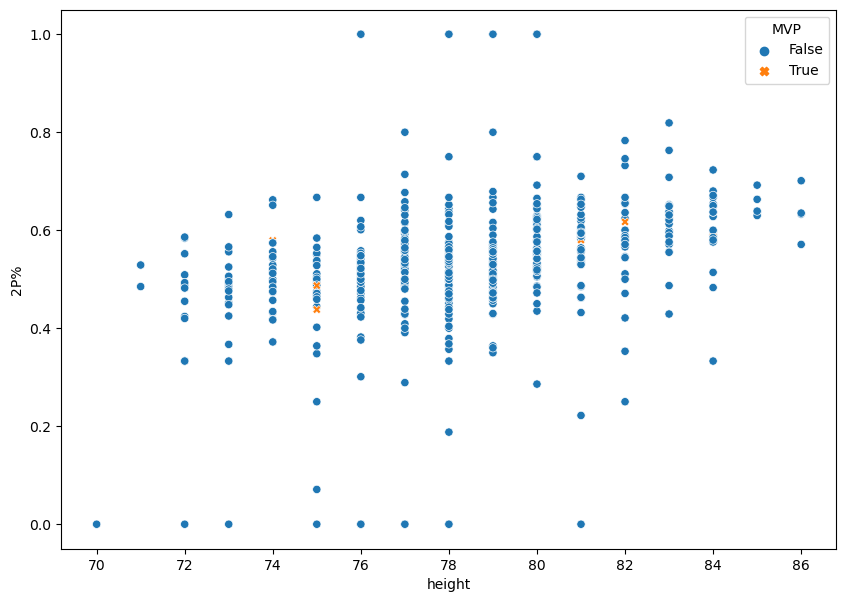

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=nba, x='height', y='2P%', style='MVP', hue='MVP')

#### Section 2: Plot Customization

In [22]:
russ_p = pd.read_csv('russia_losses_personnel.csv')
russ_e = pd.read_csv('russia_losses_equipment.csv')
russ_p.drop(columns=['personnel*'])
russ = russ_p.merge(russ_e, how='left', on='date')
#Put the date column into the index



In [23]:
russ['date'] = pd.to_datetime(russ['date'])
russ = russ.set_index('date')
russ.head()

,day_x,personnel,personnel*,POW,day_y,aircraft,helicopter,tank,APC,field artillery,...,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
date,,,,,,,,,,,,,,,,,,,,,
2022-02-25,2,2800,about,0.0,2,10,7,80,516,49,...,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-26,3,4300,about,0.0,3,27,26,146,706,49,...,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27,4,4500,about,0.0,4,27,26,150,706,50,...,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-28,5,5300,about,0.0,5,29,29,150,816,74,...,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,6,5710,about,200.0,6,29,29,198,846,77,...,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
key_events = {'2022-09-11' : 'Ukraine retakes Kharkiv',
              '2022-09-21' : 'Putin mobilizes additional 300,000 Troops',
              '2022-10-05' : 'Russia Annexes 4 Ukranian Regions',
              '2022-10-08' : 'Crimean Bridge Explosion',
              '2023-02-20' : 'Biden visits Ukraine',
              '2023-06-23' : 'Wagner Group Marches towards Moscow'}
              
              
    

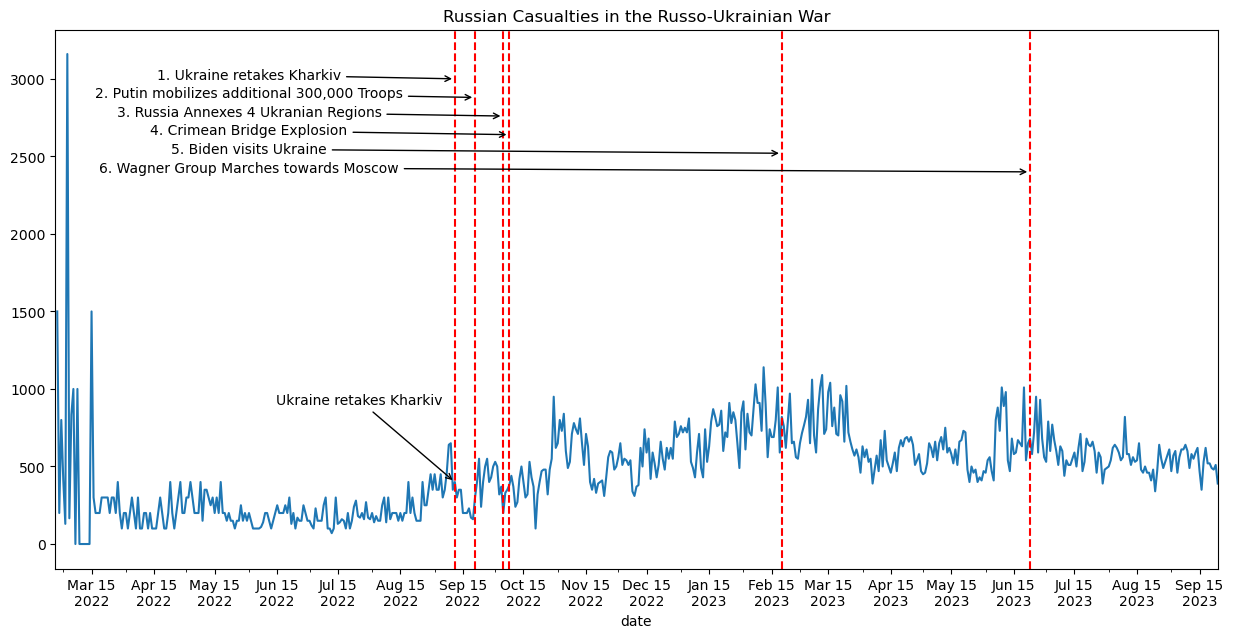

In [25]:
#Plot the cumulative personnel loss
#These numbers are all cumulative
fig, ax = plt.subplots(figsize=(15, 7))
russ_personnel_diff = russ.personnel.diff()
russ_personnel_diff.plot(ax =ax)
for date in key_events.keys():
    plt.axvline(x=date, color='red', linestyle='dashed')
    
plt.title("Russian Casualties in the Russo-Ukrainian War")

#Annotations
plt.annotate(
    key_events['2022-09-11'],
    xy=('2022-09-11', russ_personnel_diff.loc['2022-09-11']),
    xytext=('2022-09-05', russ_personnel_diff.loc['2022-09-11']+500),
    arrowprops = {'arrowstyle':'->'}, ha='right'

)



#Place them all on the same x tick
y_max = 3000
for i, date in enumerate(key_events):
    plt.annotate(
        text=f"{i+1}. {key_events[date]}",
        xy=(date, y_max-i*120),
        xytext=('2022-06-01', y_max-i*120),
        arrowprops={'arrowstyle':'->'}, 
        ha='center'
    )




#Axis formatting
#(Advanced) There are a lot of ways to format the axis
#For a comprehensive list of tick formatting see https://matplotlib.org/stable/gallery/ticks/index.html
#Show class the above link


#We can choose which x ticks show up and how to format them 
tick_locs = russ_personnel_diff.index[russ_personnel_diff.index.day == 15].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels, rotation=0)
plt.show()






#### Section 4: Facet Plots

<ul>
<li> Motivation: "Faceting allows us to plot subsets (facets) of our data across subplots." </li>
<li>In simple terms, it allows us to create conditional plots. </li>
<li>The rows and columns that build the FacetGrid should be categorical. </li>
<li>The central function to create facet plots is sns.FacetGrid(), and the map method on the resulting FacetGrid object. </li>
</ul>

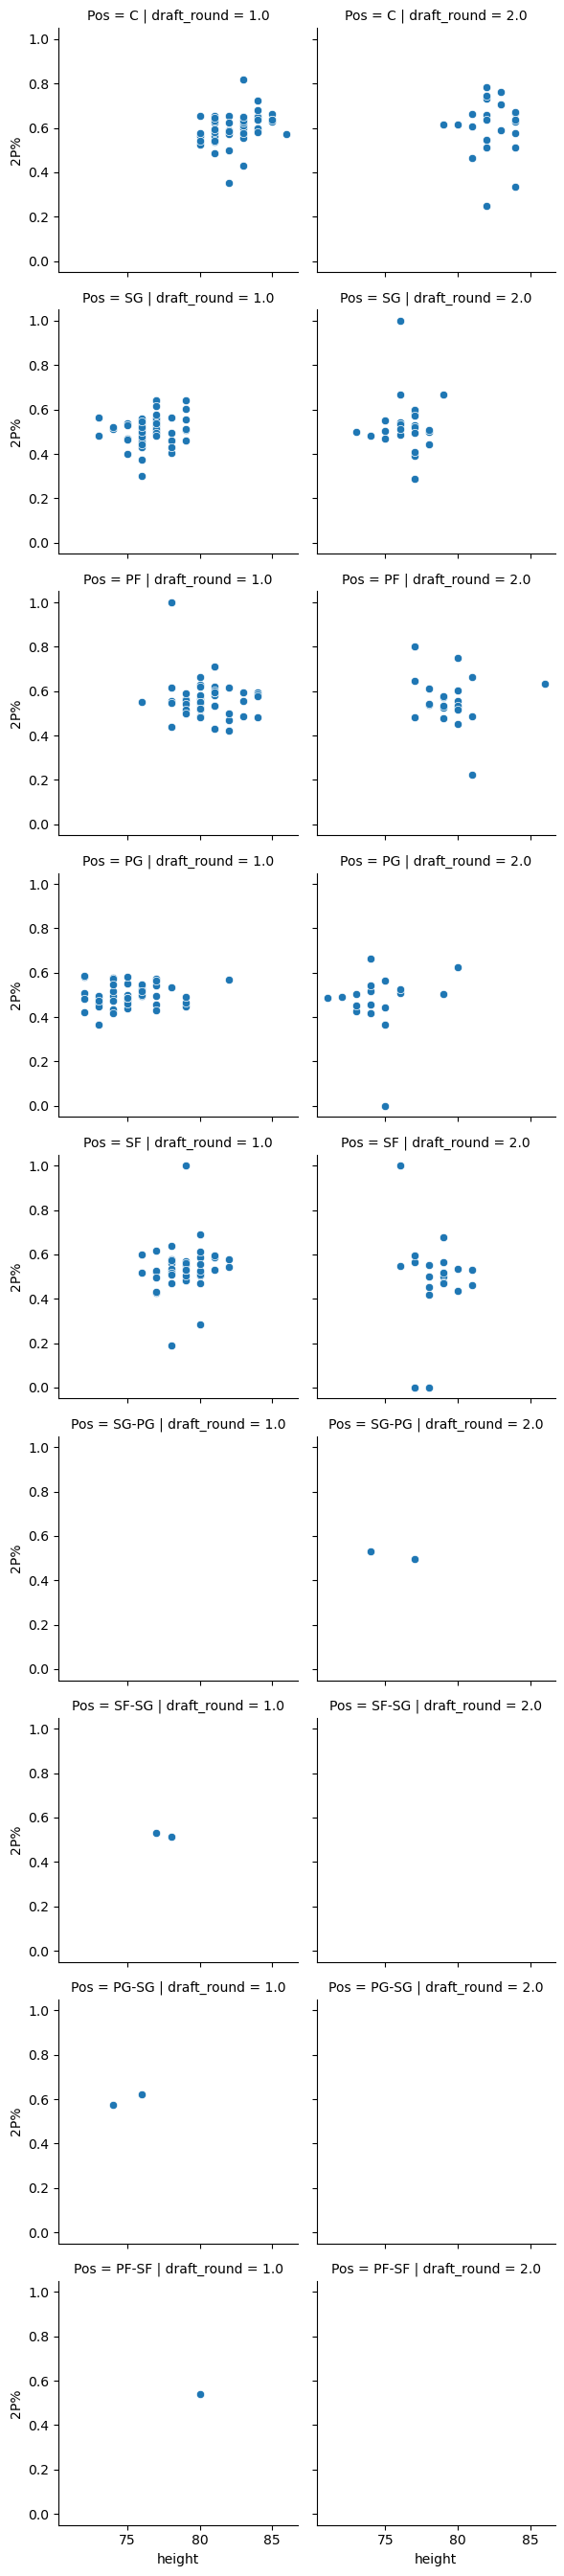

In [26]:
#Examples

#sns.FacetGrid(data, row, col, height)

#Filter out draft_rounds = 0 and is na
filtered_draft = nba[(~nba.draft_round.isna()) & (nba.draft_round !=0)]

g = sns.FacetGrid(data=filtered_draft, row='Pos', col='draft_round')
g = g.map(sns.scatterplot, 'height', '2P%')


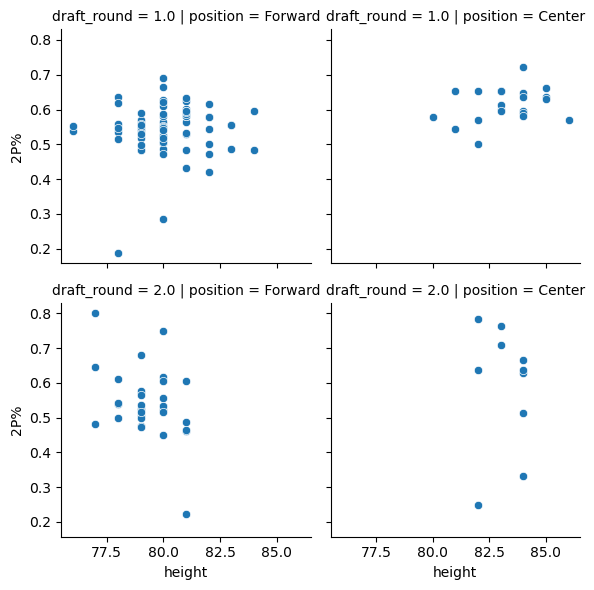

In [27]:

centers_forwards = nba[ (nba.position=='Center') | (nba.position=='Forward')]
#col=position
#row=draft_number
g = sns.FacetGrid(centers_forwards, row='draft_round', col='position')
g.map(sns.scatterplot, 'height', '2P%')



#### Section 5: Changing Plotting Styles Easily

All available preset matplotlib styles can be found at this link: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [28]:
import matplotlib

Solarize_Light2


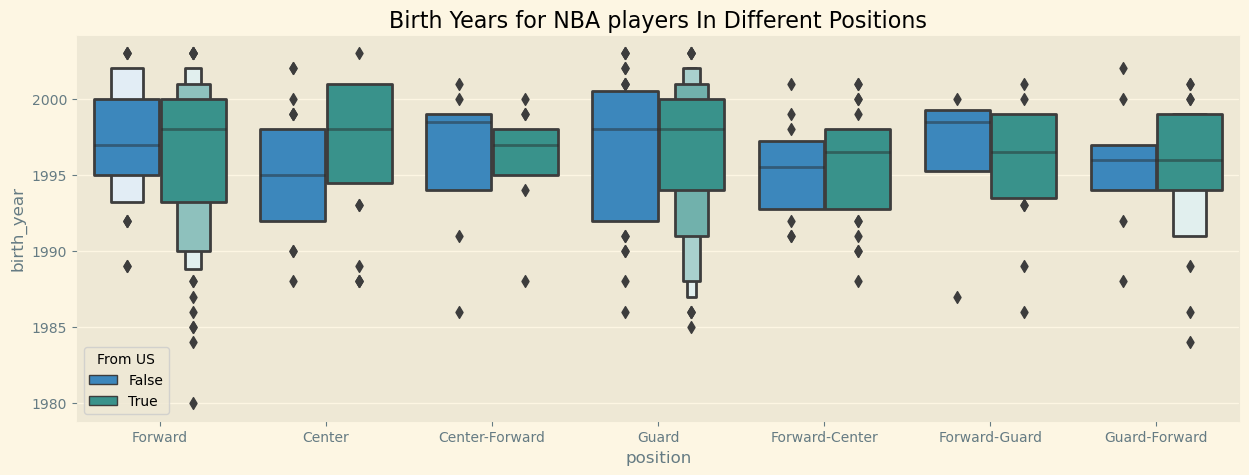

_classic_test_patch


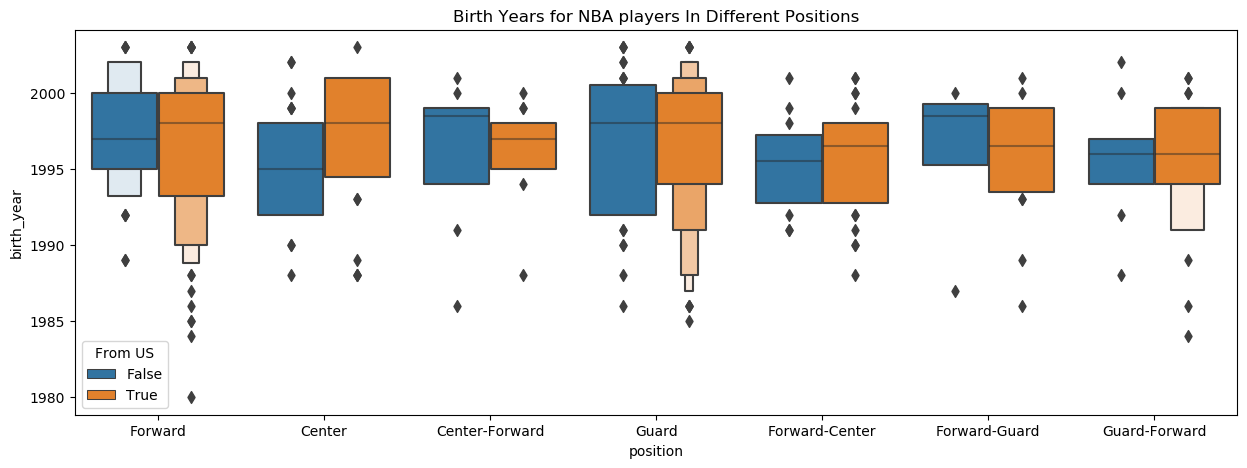

_mpl-gallery


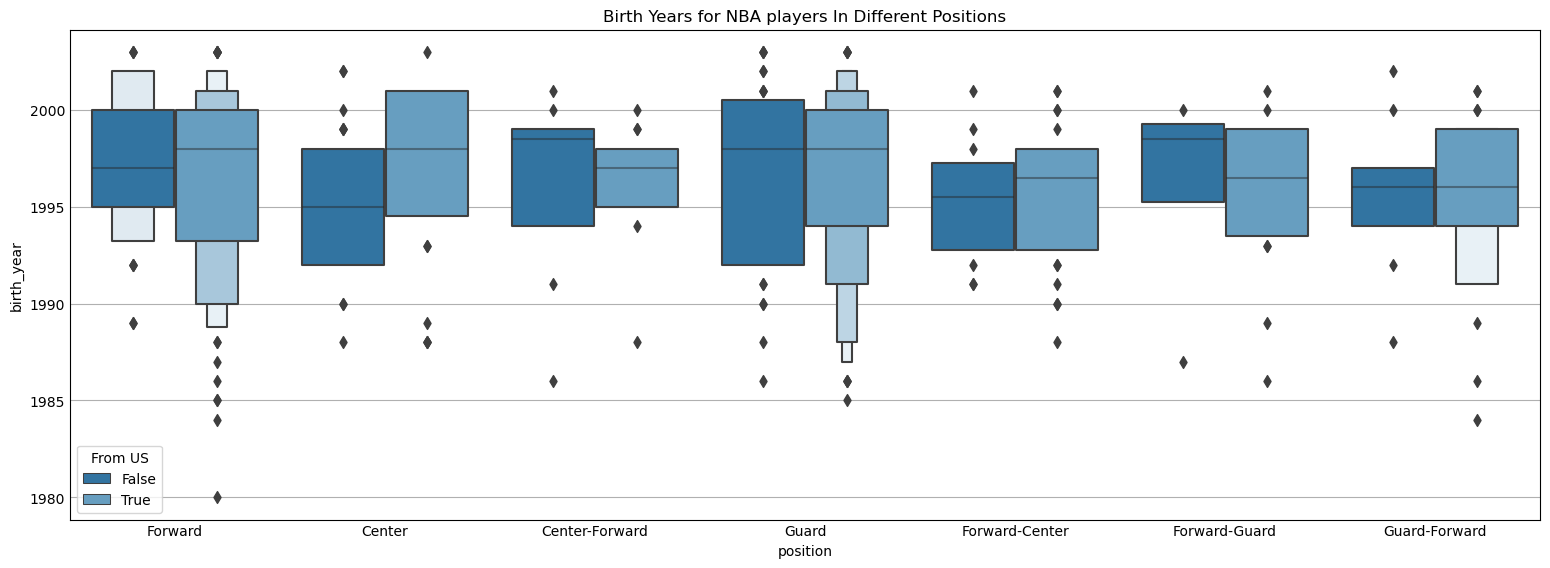

_mpl-gallery-nogrid


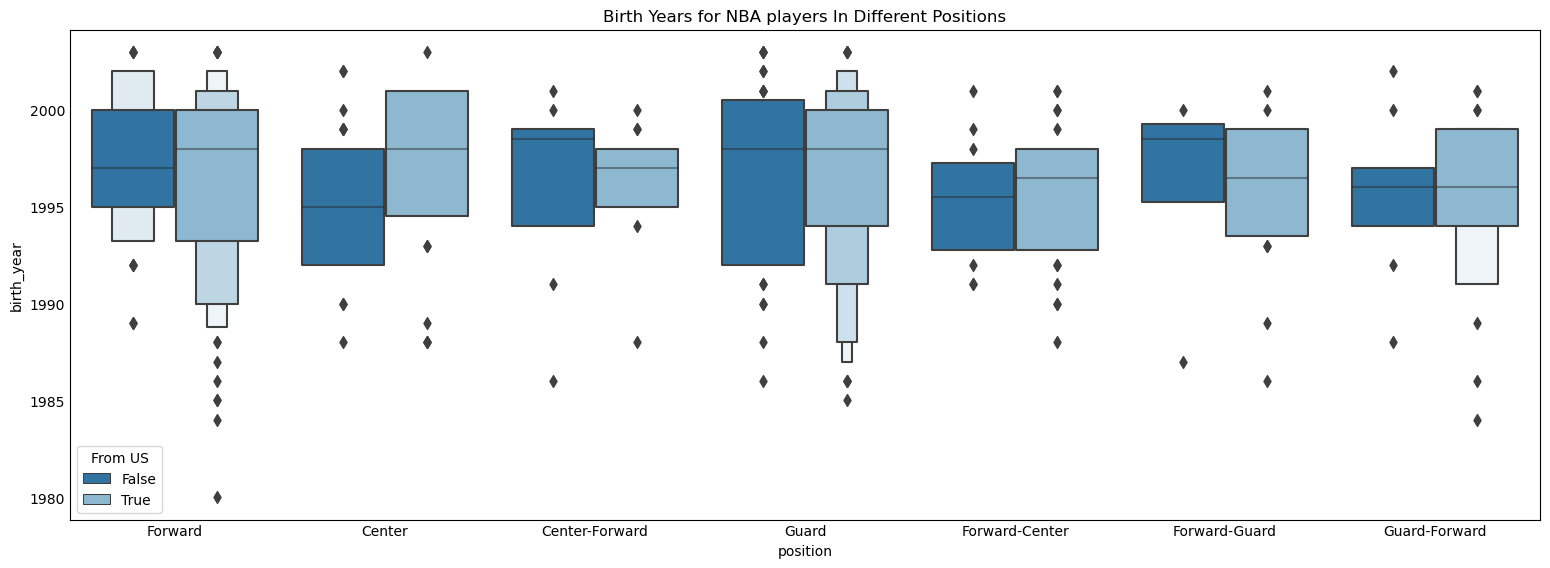

bmh


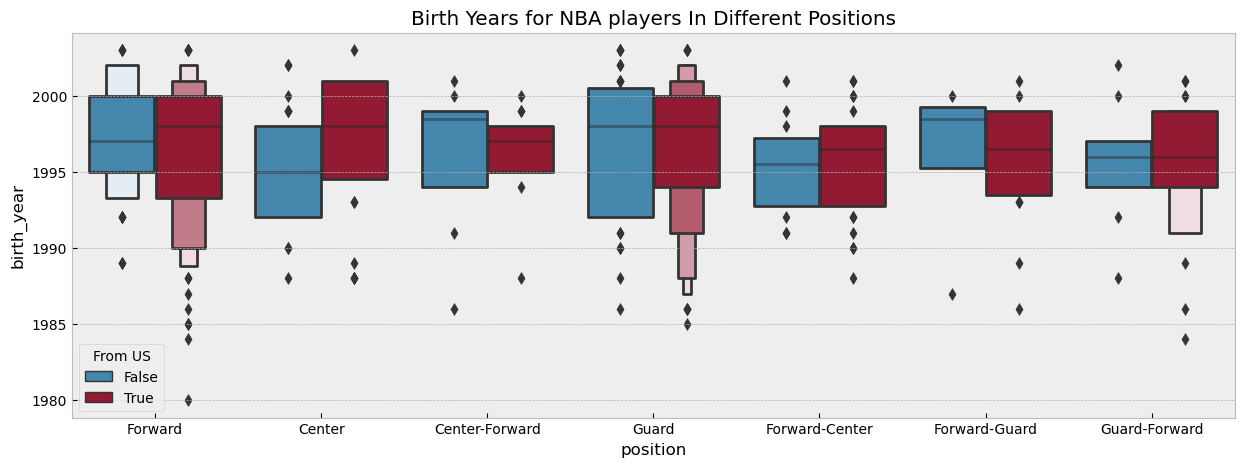

classic


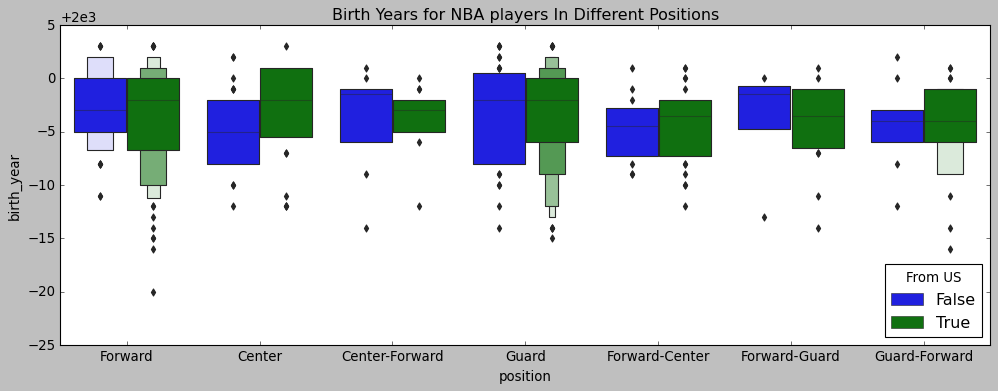

dark_background


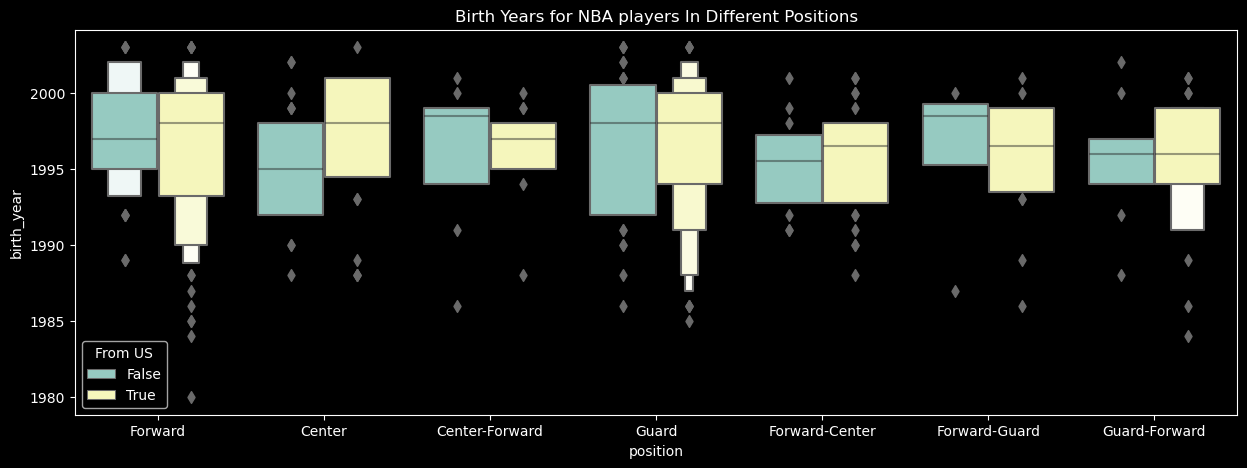

fast


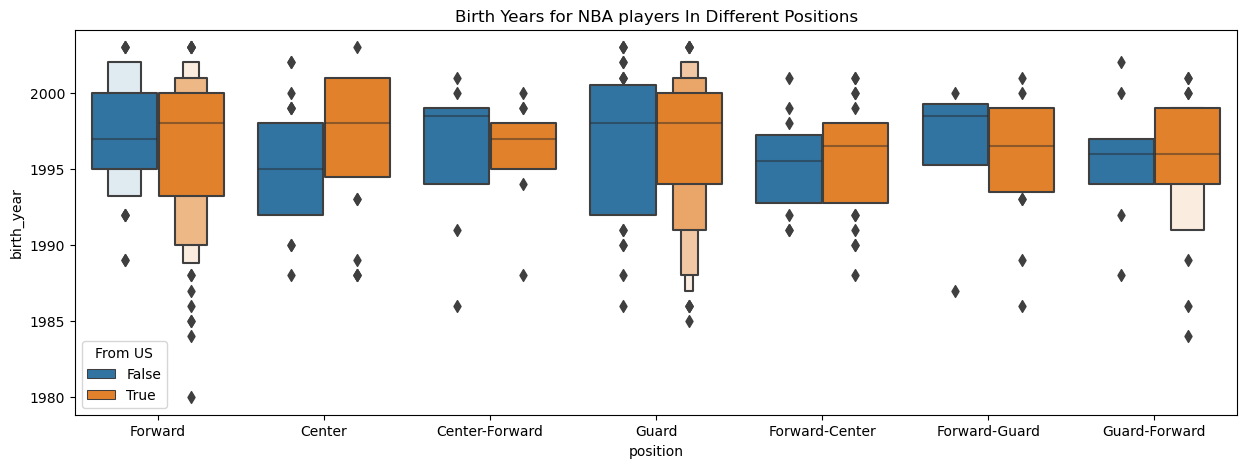

fivethirtyeight


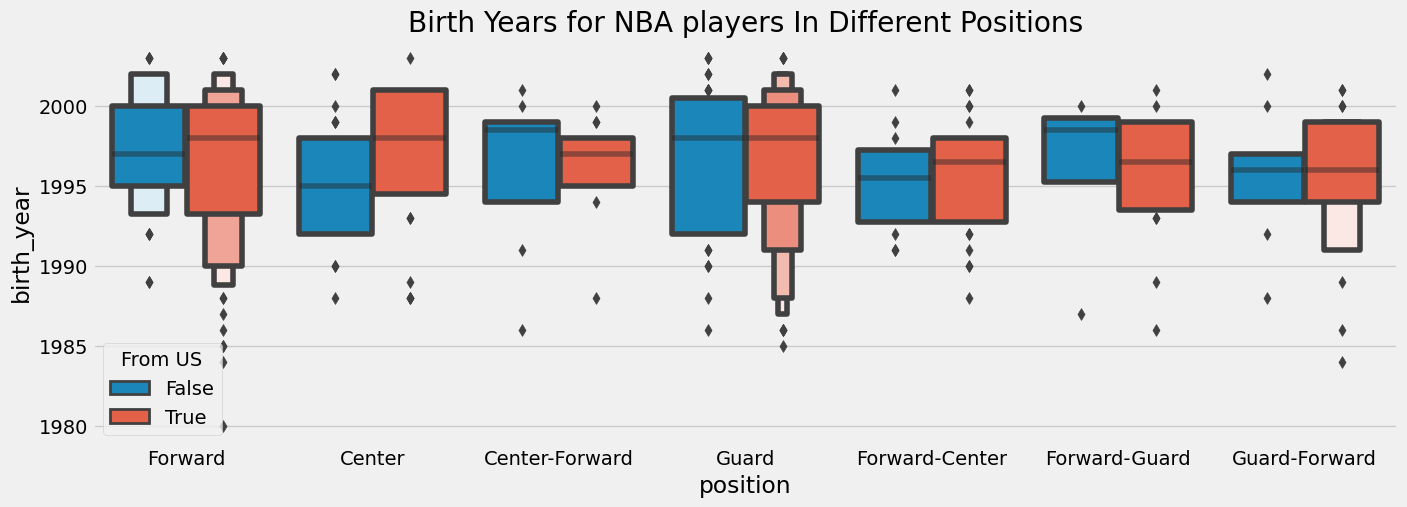

ggplot


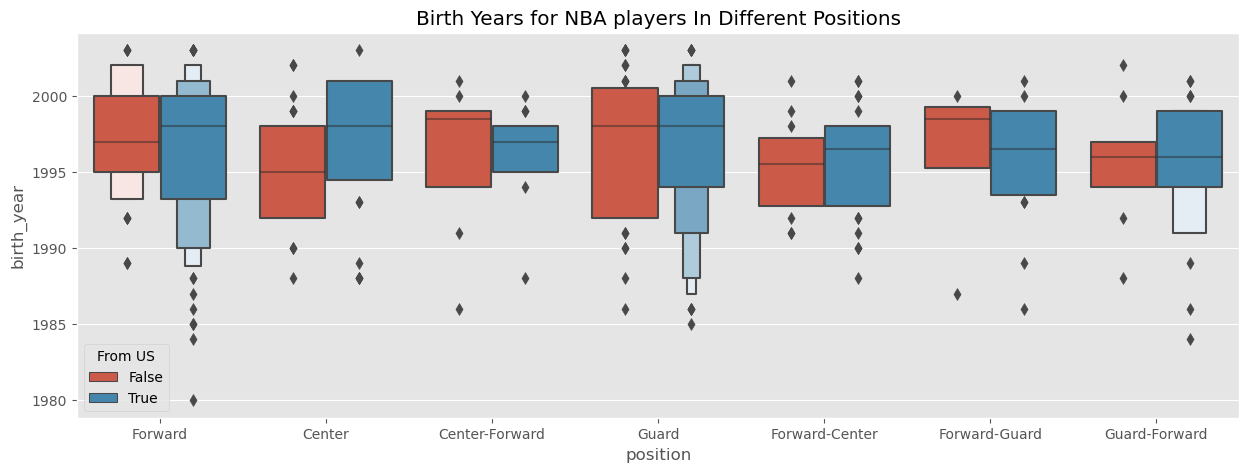

grayscale


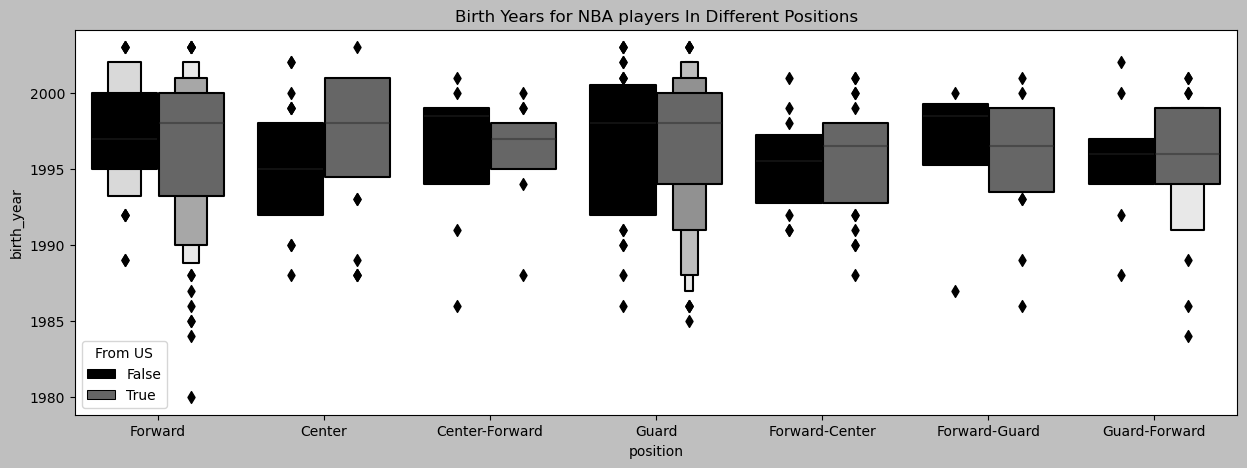

seaborn-v0_8


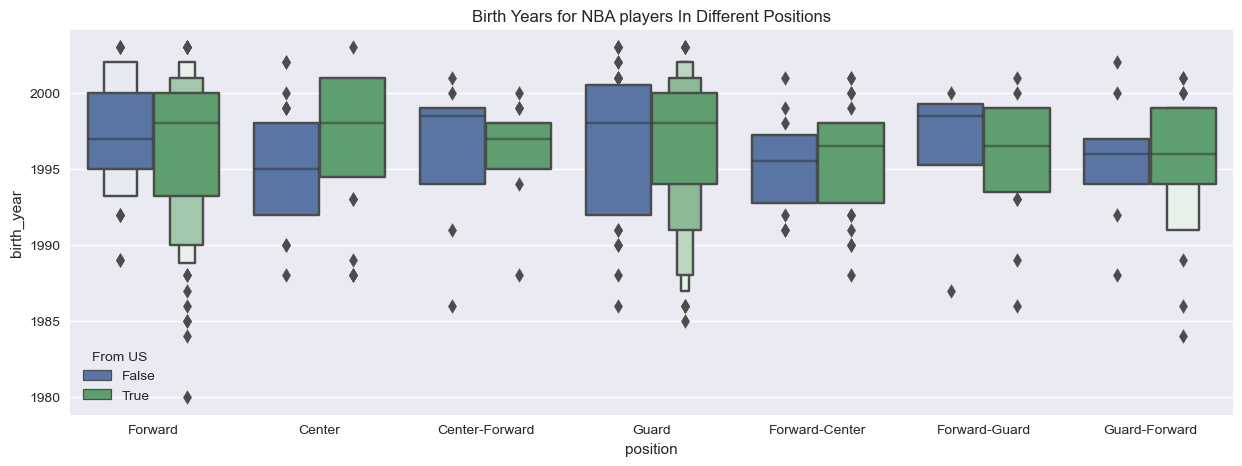

seaborn-v0_8-bright


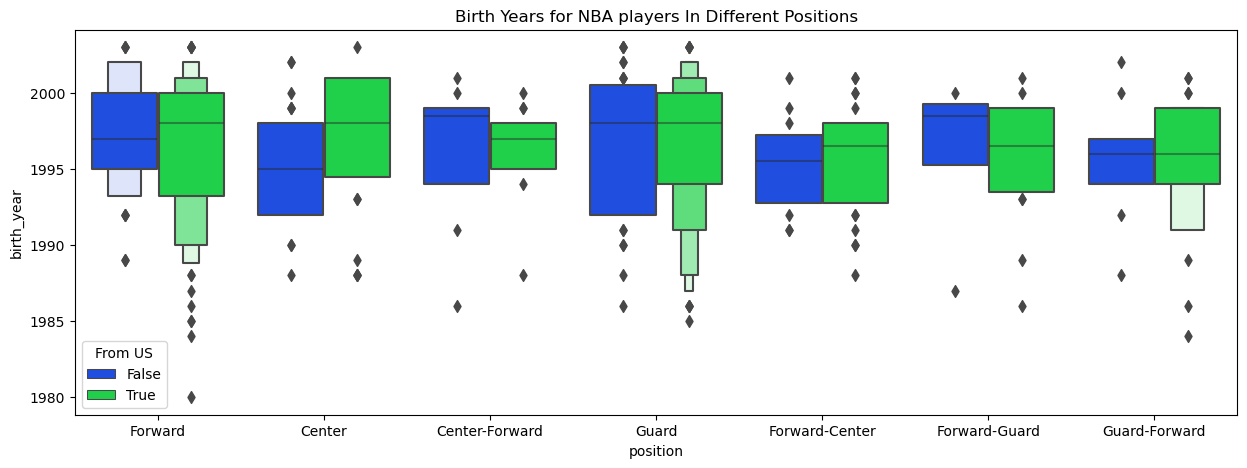

seaborn-v0_8-colorblind


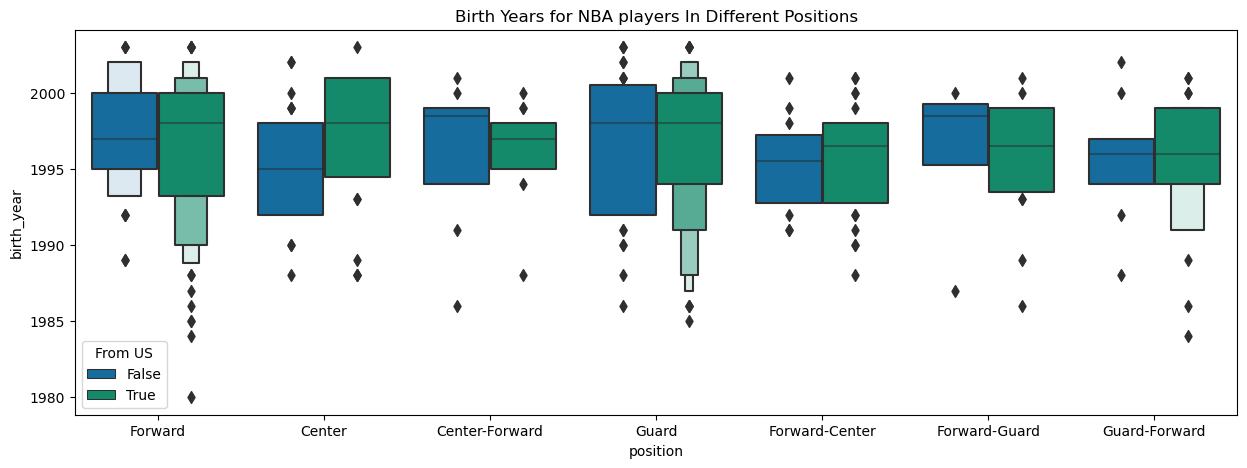

seaborn-v0_8-dark


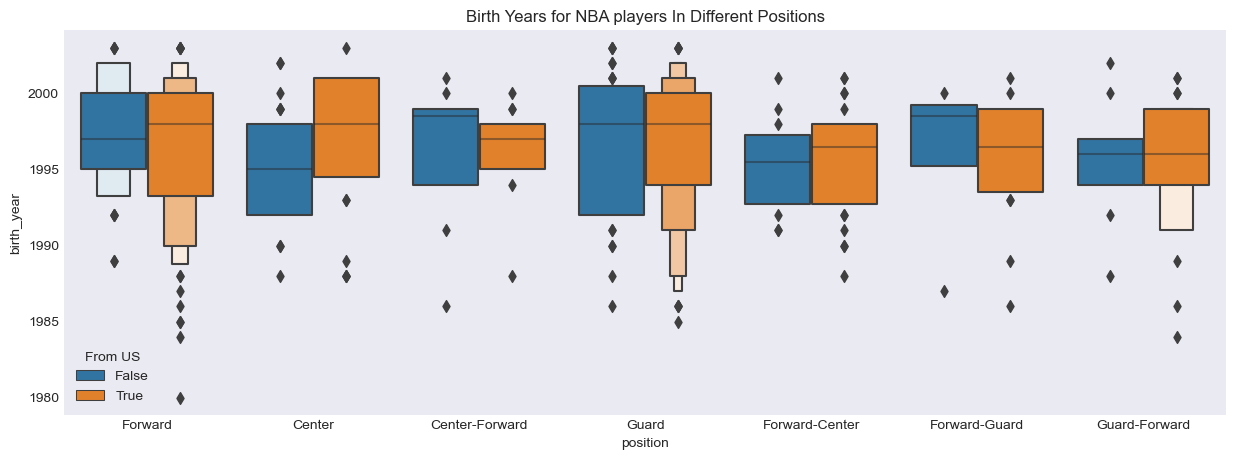

seaborn-v0_8-dark-palette


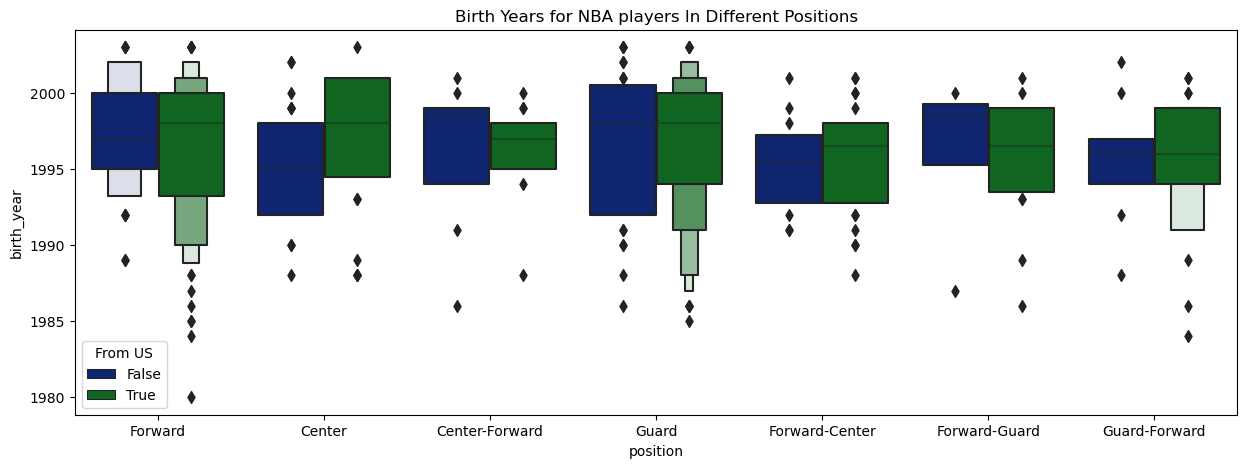

seaborn-v0_8-darkgrid


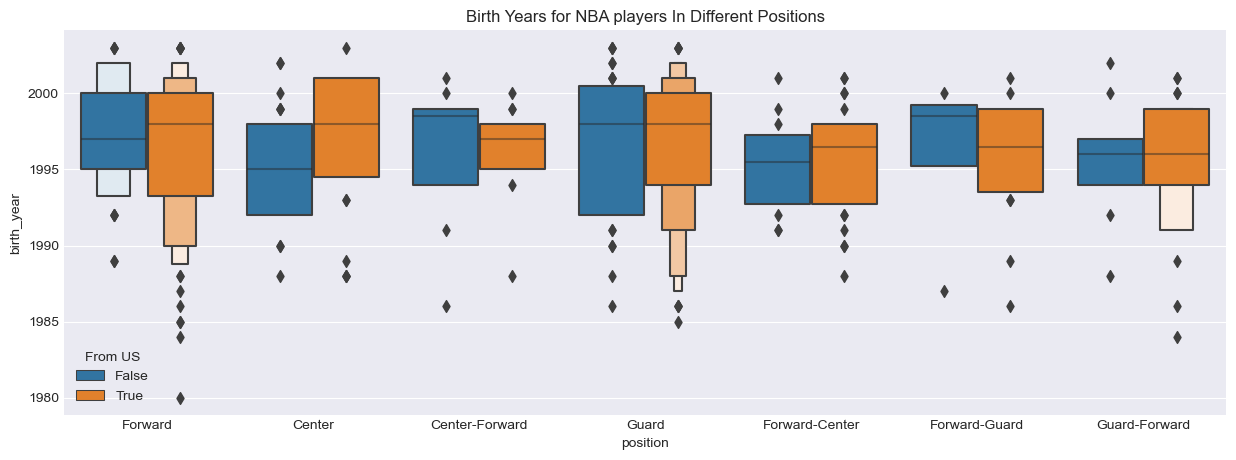

seaborn-v0_8-deep


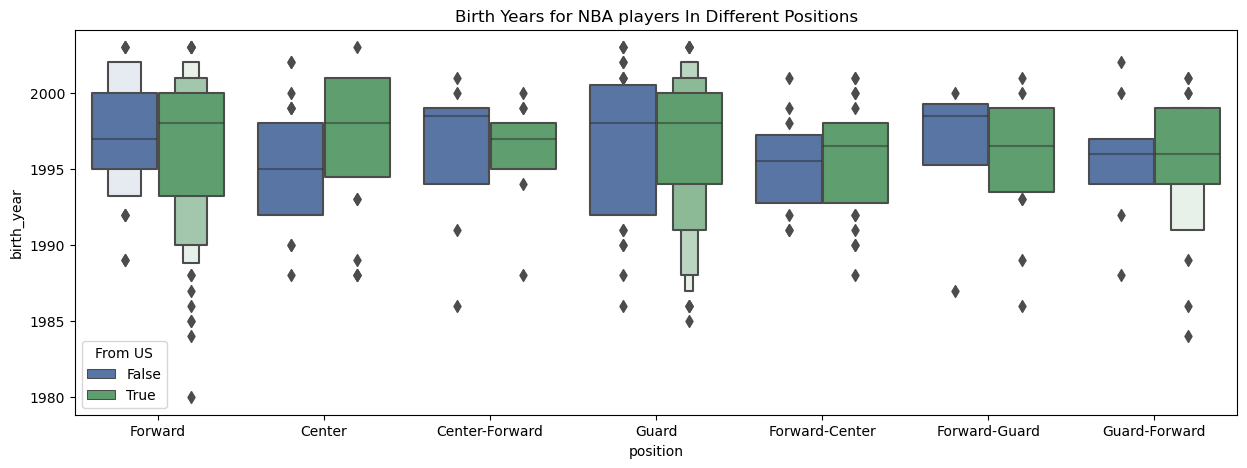

seaborn-v0_8-muted


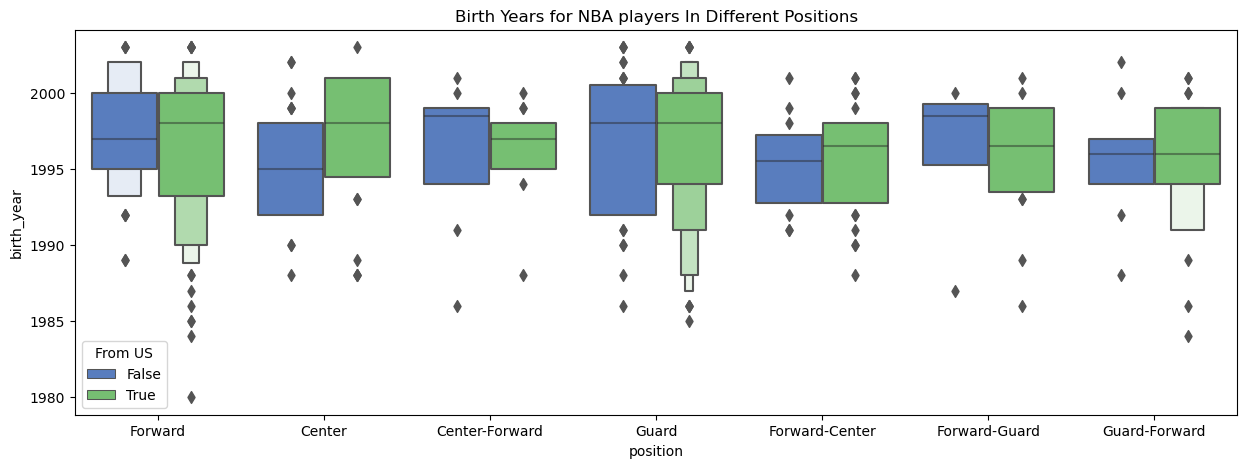

seaborn-v0_8-notebook


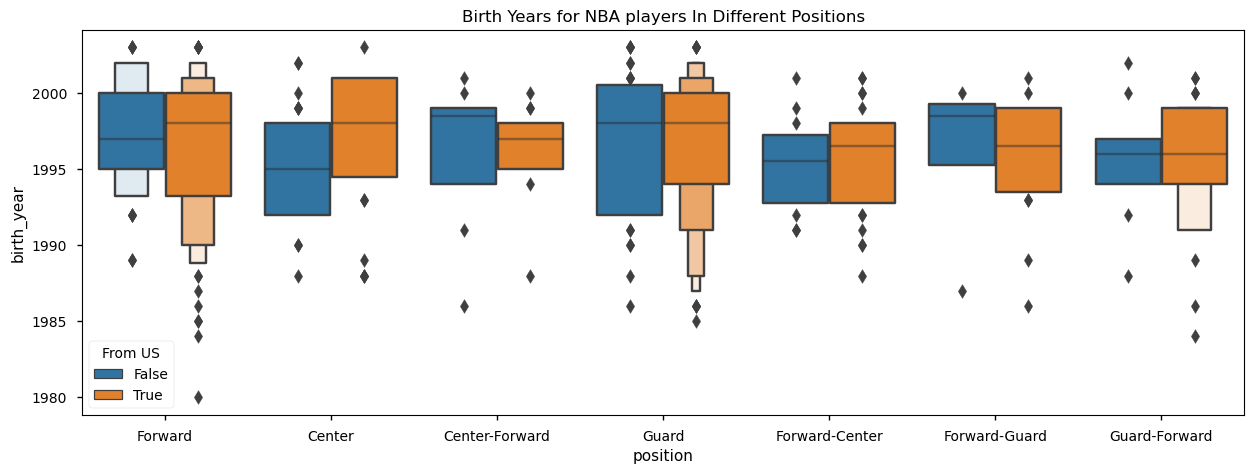

seaborn-v0_8-paper


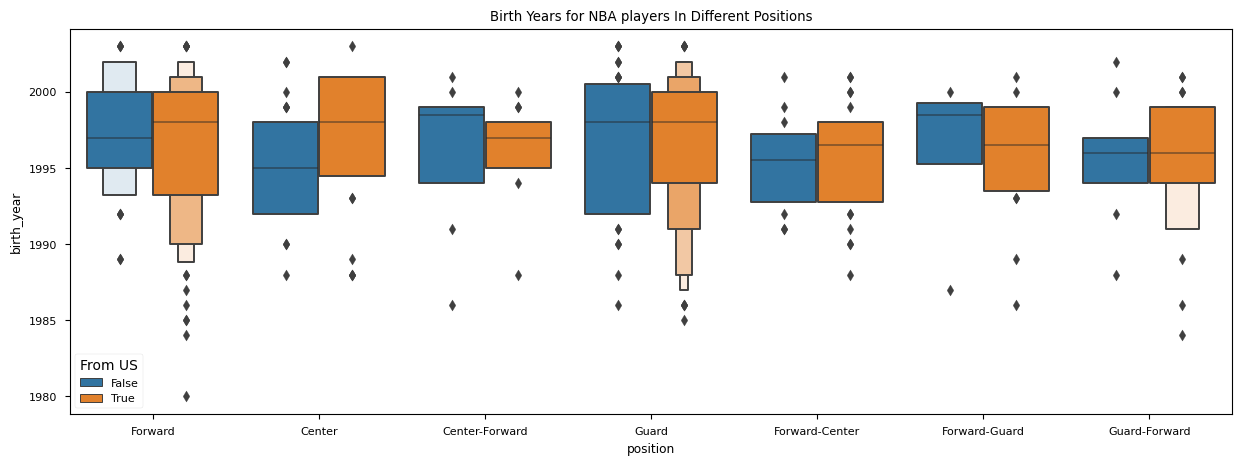

seaborn-v0_8-pastel


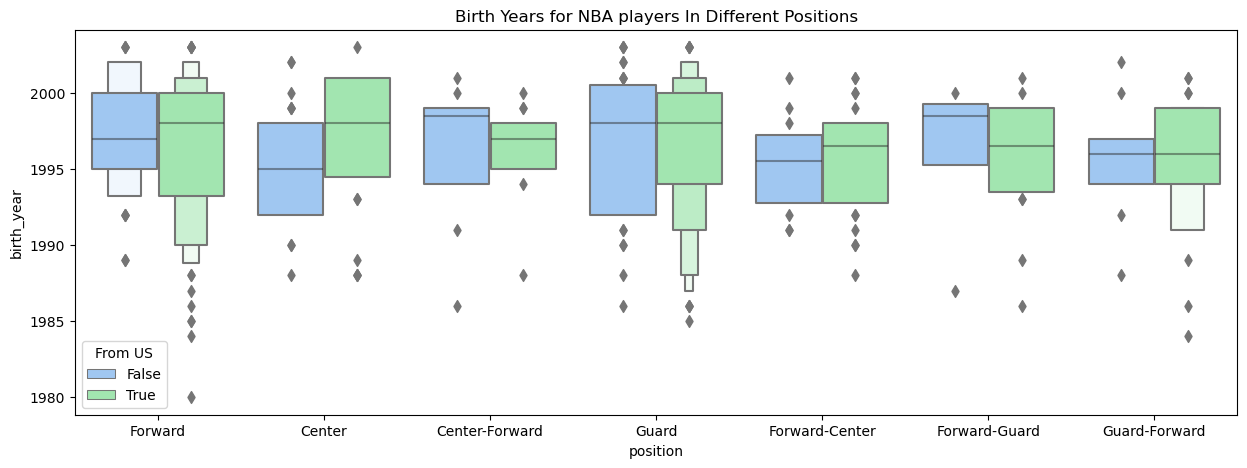

seaborn-v0_8-poster


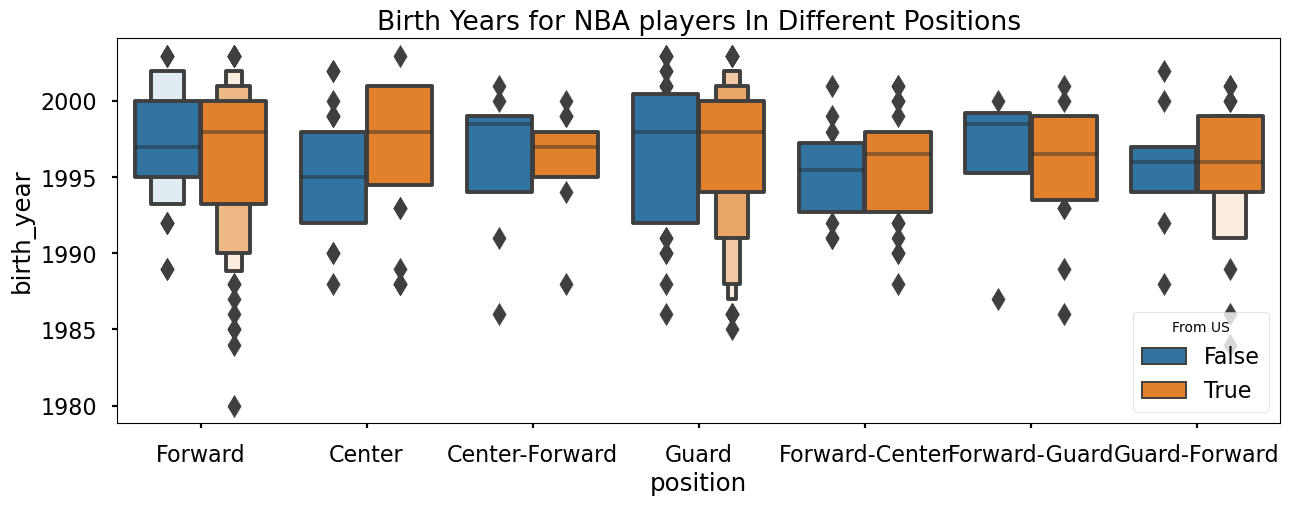

seaborn-v0_8-talk


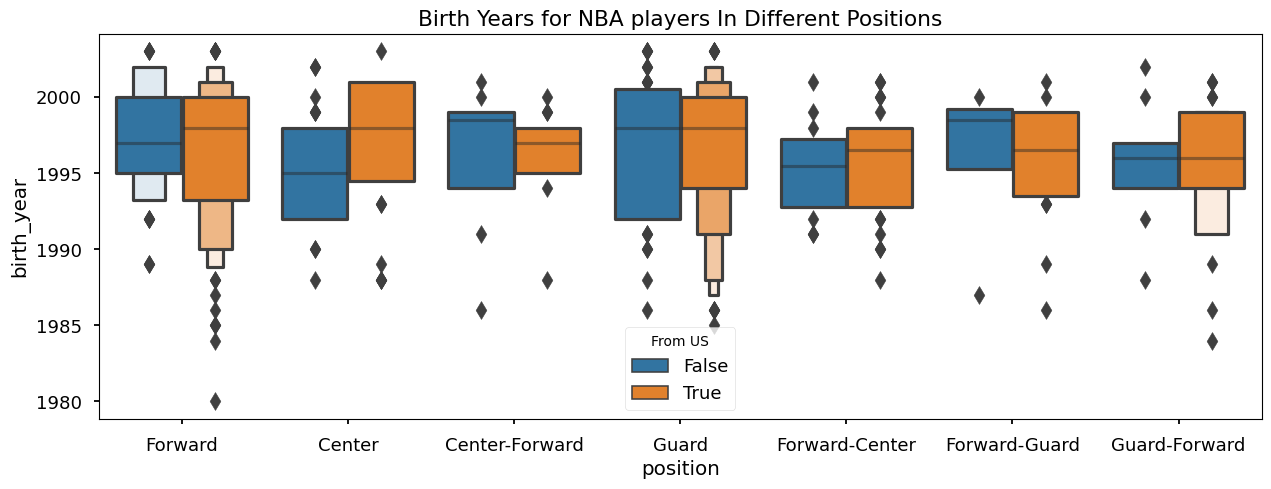

seaborn-v0_8-ticks


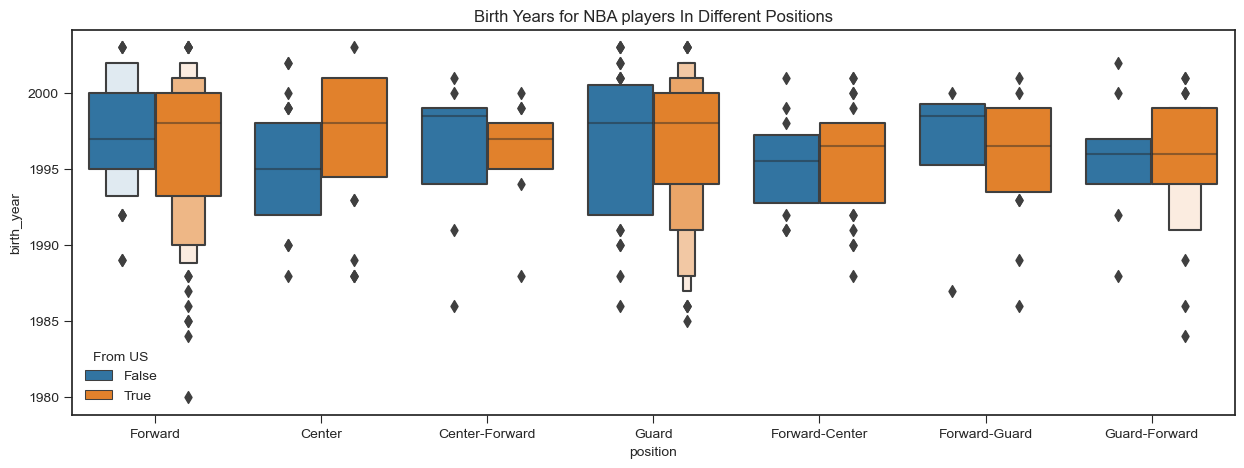

seaborn-v0_8-white


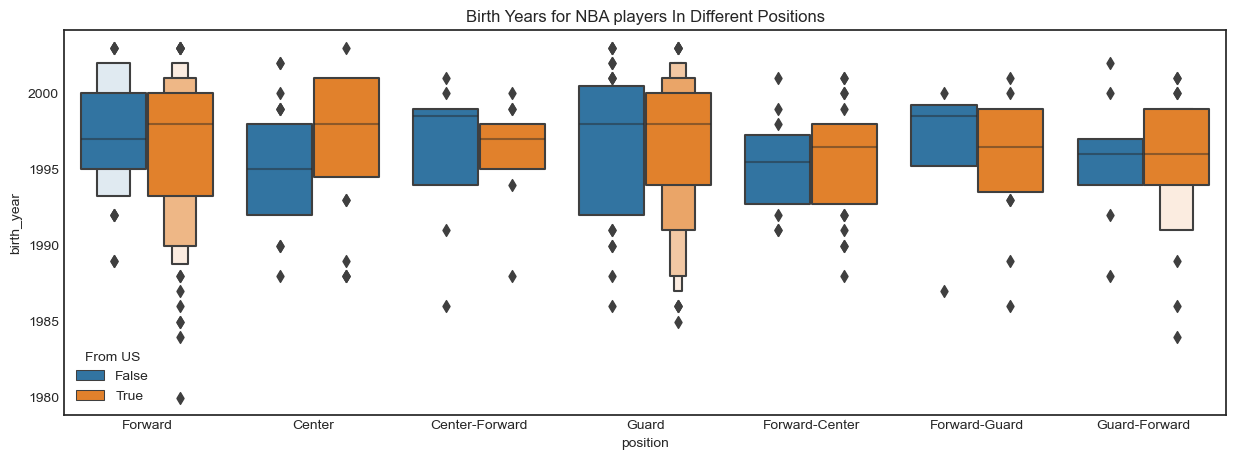

seaborn-v0_8-whitegrid


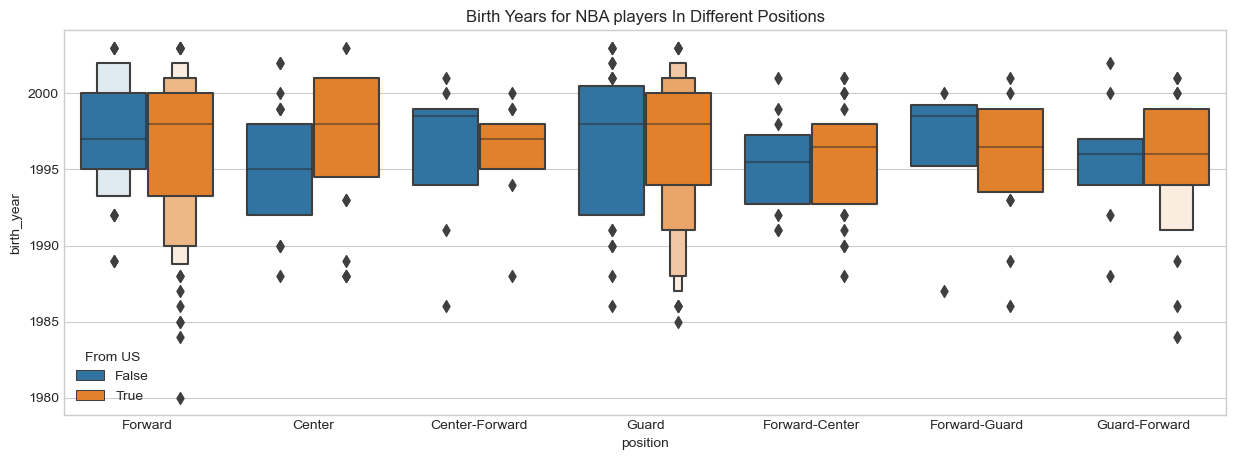

tableau-colorblind10


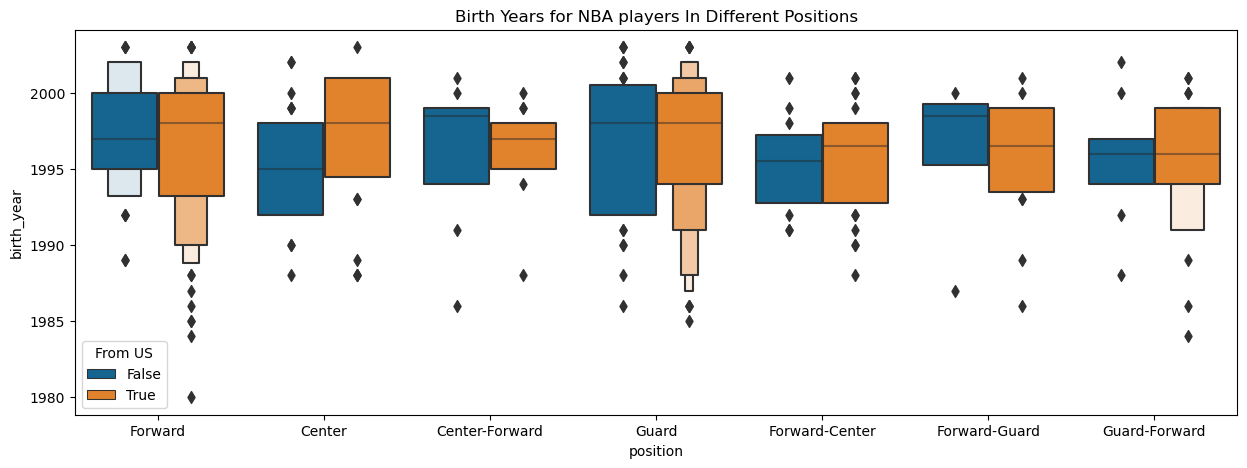

In [29]:

#plt.style.use('...')
#or use a context manager
for style in matplotlib.style.available:
    with plt.style.context(style):
        print(style)
        fig, ax = plt.subplots(figsize=(15, 5))
        sns.boxenplot(data=nba, x='position', y='birth_year', hue='From US', ax = ax)
        plt.title('Birth Years for NBA players In Different Positions')
        plt.show()

    
    

#### Section 6: (Advanced/Optional) Long vs Wide Data

Example and code comes directly from the seaborn documentation under this link: https://seaborn.pydata.org/tutorial/data_structure.html

In [30]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


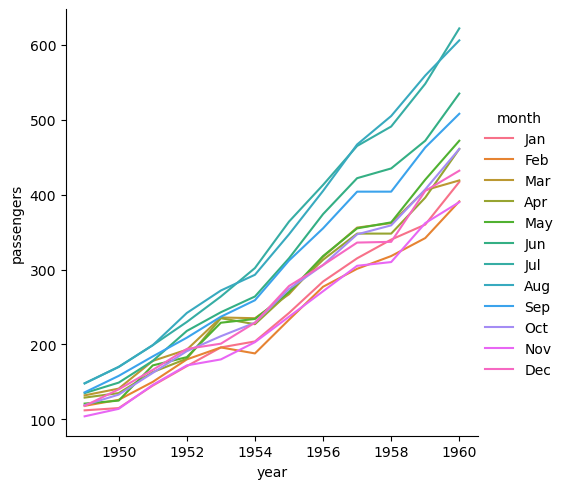

In [31]:
sns.relplot(data=flights, x='year', y='passengers', hue='month', kind='line')

In [32]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


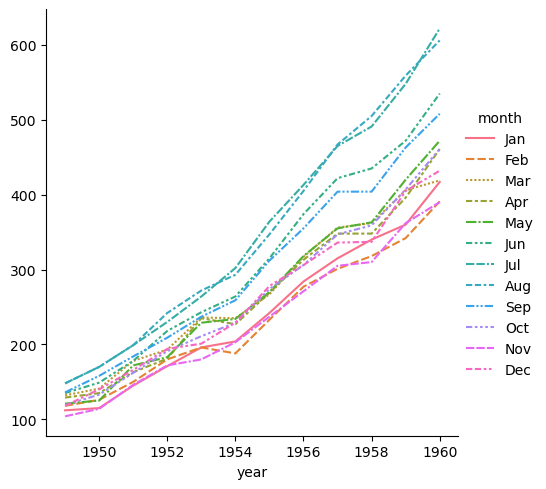

In [33]:
sns.relplot(data=flights_wide, kind="line")

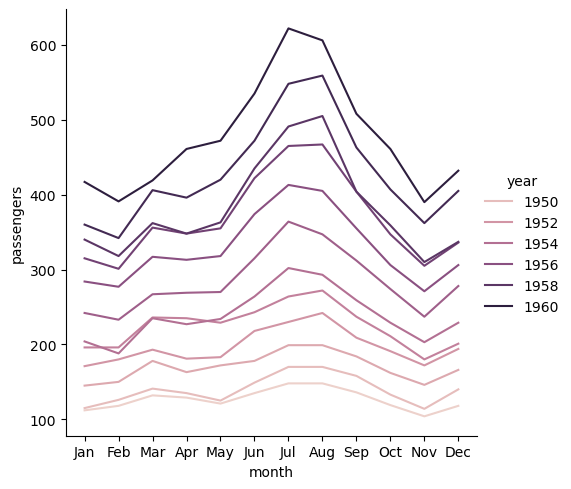

In [34]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")